In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
lat = np.linspace(0, 40, 100)
lon = np.linspace(-20, 20, 120)

lon_mesh, lat_mesh = np.meshgrid(lon, lat)

# make some fake temperature data
temp = 30 + np.cos(lat_mesh/10)*np.cos(lon_mesh/10)

In [3]:
ds_fine = xr.Dataset(coords=dict(lat=lat, lon=lon))
ds_fine['temp'] = xr.DataArray(temp, coords=dict(lat=lat, lon=lon), dims=('lat', 'lon'))

<xarray.DataArray 'temp' (lat: 100, lon: 120)>
array([[ 29.583853,  29.614647,  29.645876, ...,  29.645876,  29.614647,
         29.583853],
       [ 29.584193,  29.614962,  29.646165, ...,  29.646165,  29.614962,
         29.584193],
       [ 29.585211,  29.615905,  29.647032, ...,  29.647032,  29.615905,
         29.585211],
       ..., 
       [ 30.296546,  30.274602,  30.252348, ...,  30.252348,  30.274602,
         30.296546],
       [ 30.284511,  30.263458,  30.242107, ...,  30.242107,  30.263458,
         30.284511],
       [ 30.272012,  30.251883,  30.231471, ...,  30.231471,  30.251883,
         30.272012]])
Coordinates:
  * lat      (lat) float64 0.0 0.404 0.8081 1.212 1.616 2.02 2.424 2.828 ...
  * lon      (lon) float64 -20.0 -19.66 -19.33 -18.99 -18.66 -18.32 -17.98 ...

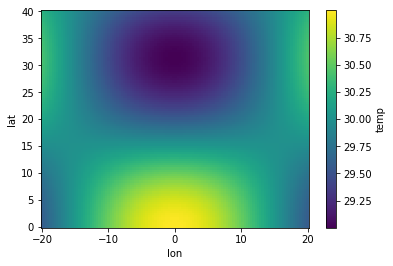

In [4]:
ds_fine.temp.plot()
ds_fine.temp

# Down-scaling to coarser resolution

In [5]:
lat_coarse = np.linspace(0, 40, 20)
lon_coarse = np.linspace(-20, 20, 24)

In [6]:
ds_new = xr.Dataset()
ds_new['lat'] = lat_coarse
ds_new['lon'] = lon_coarse

In [7]:
import xesmf

In [8]:
regridder = xesmf.Regridder(ds_in=ds_fine, ds_out=ds_new, method='bilinear')

Overwrite existing file: bilinear_100x120_20x24.nc 
 You can set reuse_weights=True to save computing time.


In [9]:
temp_coarse = regridder(ds_fine.temp)
temp_coarse

<xarray.DataArray 'temp' (lat: 20, lon: 24)>
array([[ 29.583853,  29.747493,  29.918722, ...,  29.918722,  29.747493,
         29.583853],
       [ 29.593096,  29.753102,  29.920527, ...,  29.920527,  29.753102,
         29.593096],
       [ 29.620275,  29.769593,  29.925836, ...,  29.925836,  29.769593,
         29.620275],
       ..., 
       [ 30.376902,  30.228695,  30.073613, ...,  30.073613,  30.228695,
         30.376902],
       [ 30.331775,  30.201313,  30.0648  , ...,  30.0648  ,  30.201313,
         30.331775],
       [ 30.272012,  30.165051,  30.053127, ...,  30.053127,  30.165051,
         30.272012]])
Coordinates:
  * lon      (lon) float64 -20.0 -18.26 -16.52 -14.78 -13.04 -11.3 -9.565 ...
  * lat      (lat) float64 0.0 2.105 4.211 6.316 8.421 10.53 12.63 14.74 ...
Attributes:
    regrid_method:  bilinear

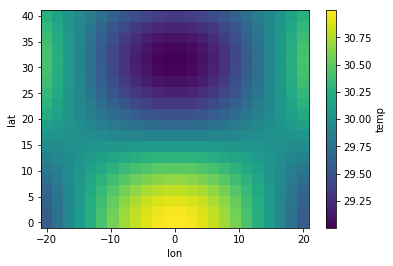

In [10]:
temp_coarse.plot()